# Electric dipole

![electric_field.png](efield.png)

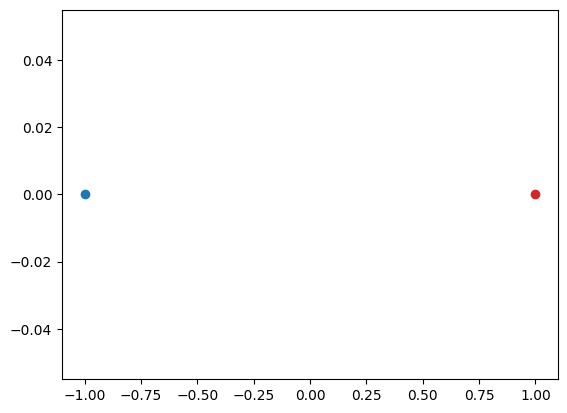

In [1]:
import numpy as np
import matplotlib.pyplot as plt


q = 10
d = 10
position_pos = (1, 0)
position_neg = (-1, 0)

x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)

X, Y = np.meshgrid(x, y)
Ex = np.zeros_like(X)
Ey = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        r = np.sqrt(x[i]**2 + y[j]**2)
        Ex[i, j] = q * d / 4 * np.pi * 3 * np.cos()
        Ey[i, j] = 

plt.scatter(*position_neg, color="tab:blue")
plt.scatter(*position_pos, color="tab:red")
plt.show()


## Chen et al.,  Journal of Comparative Physiology A, 2005

2.8284271247461903


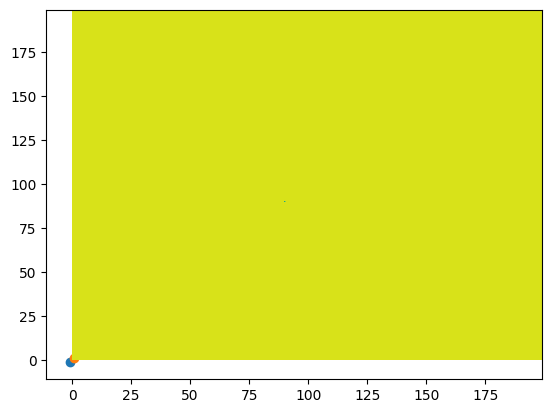

In [25]:
def distance2D(p1, p2):
    assert(len(p1) == 2)
    d = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    return d

def potential(point, charge_positions, charges, npos, ntotal):
    pos = 0.0
    for i in range(npos):
        d = distance2D(point, charge_positions[i])
        if d == 0.0:
            continue
        pos += charges[i]/npos / d

    neg = 0.0
    for i in range(ntotal - npos, ntotal):
        d = distance2D(point, charge_positions[i])
        if d == 0.0:
            continue
        neg += charges[i]/(ntotal - npos)/ d
    return pos - neg


charges = [-10, 0]
ntotal = 2
npos = 1
charge_positions = [(-1, -1), (1, 1)]
print(distance2D(*charge_positions))

x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)

X, Y = np.meshgrid(x, y)
E = np.zeros_like(X, dtype=float)

for i in range(len(x)):
    for j in range(len(y)):
        E[i, j] = potential((x[i], y[j]), charge_positions, charges, npos, ntotal)

plt.scatter(*charge_positions[0])
plt.scatter(*charge_positions[1])
plt.contourf(E)


In [28]:
print(np.max(E))
print(np.min(E))

-0.6487218176023415
-221147627518256.0


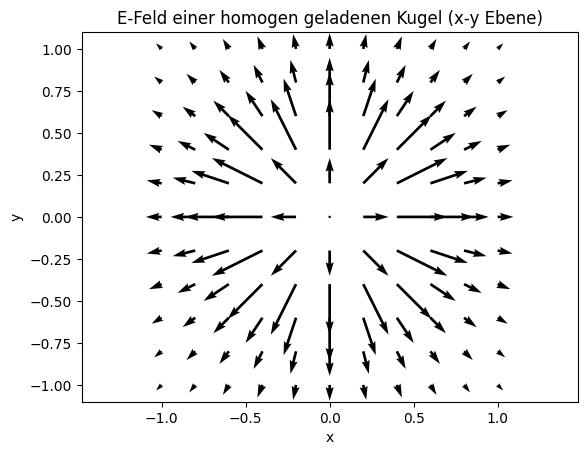

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
R = 0.5
z = 0.0

def E(r, q=1.0):
    if r < R:
        return q*r/pow(R, 3.0)
    else:
        return q/pow(r, 2.0)

def E_x(x, y, z=0.0):
    """ """
    r = sqrt(x*x + y*y + z*z)  # radius in 2D if z == 0.0
    return E(r) * x / r

def E_y(x, y, z=0.0):
    r = sqrt(x*x + y*y + z*z)
    return E(r) * y / r

v_E_x = np.vectorize(E_x)
v_E_y = np.vectorize(E_y)

X, Y = np.meshgrid(np.arange(-1.00, +1.01, 0.2), np.arange(-1.00, +1.01,
0.2))
U = v_E_x(X, Y)
V = v_E_y(X, Y)
fig=plt.figure()
ax = fig.gca()
ax.quiver(X, Y, U, V)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('E-Feld einer homogen geladenen Kugel (x-y Ebene)')
plt.show()